In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.preprocessing import StandardScaler #, MinMaxScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
# Матрица ошибок и метод для вычисления ошибок 1-го и 2-го рода
from sklearn.metrics import confusion_matrix, classification_report

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# Файл с данными скачан по ссылке https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('creditcard.csv')
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194234,130491.0,-0.993717,0.947079,1.063240,-0.234996,-0.592652,-0.376103,-0.020936,0.296434,0.502674,...,0.426475,1.211721,-0.270074,0.103499,-0.294171,-0.164017,-0.295571,0.099520,24.95,0
35507,38149.0,0.971123,-0.105384,1.100869,0.997384,-0.227676,1.302869,-0.759509,0.595049,0.469812,...,0.167657,0.635164,0.191941,-0.655591,-0.039419,-0.330495,0.125357,0.027397,9.79,0
144356,86059.0,-0.617588,0.815507,-0.444909,-1.196982,2.092234,3.356286,-0.152781,1.289079,-0.798336,...,-0.003679,-0.365643,-0.063023,1.019941,0.086281,0.368010,-0.120678,-0.013694,29.99,0


In [3]:
#df.info()

In [37]:
# Оставить только объекты без аномалий
mask = df['Class'] == 0
data_train = df[mask]

In [34]:
data_train_X = df.drop(['Time', 'Amount', 'Class'], axis='columns')

In [4]:
data_X = df.drop(['Time', 'Amount', 'Class'], axis='columns')
Y = df['Class']
#featuresDf.info()

In [5]:
classes = Y.value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
percent = classes.iloc[1] / classes.sum() * 100
print(f'Количество аномалий: {classes.iloc[1]}; Процент аномалий: {percent:.2f}%')

Количество аномалий: 492; Процент аномалий: 0.17%


In [7]:
data_X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


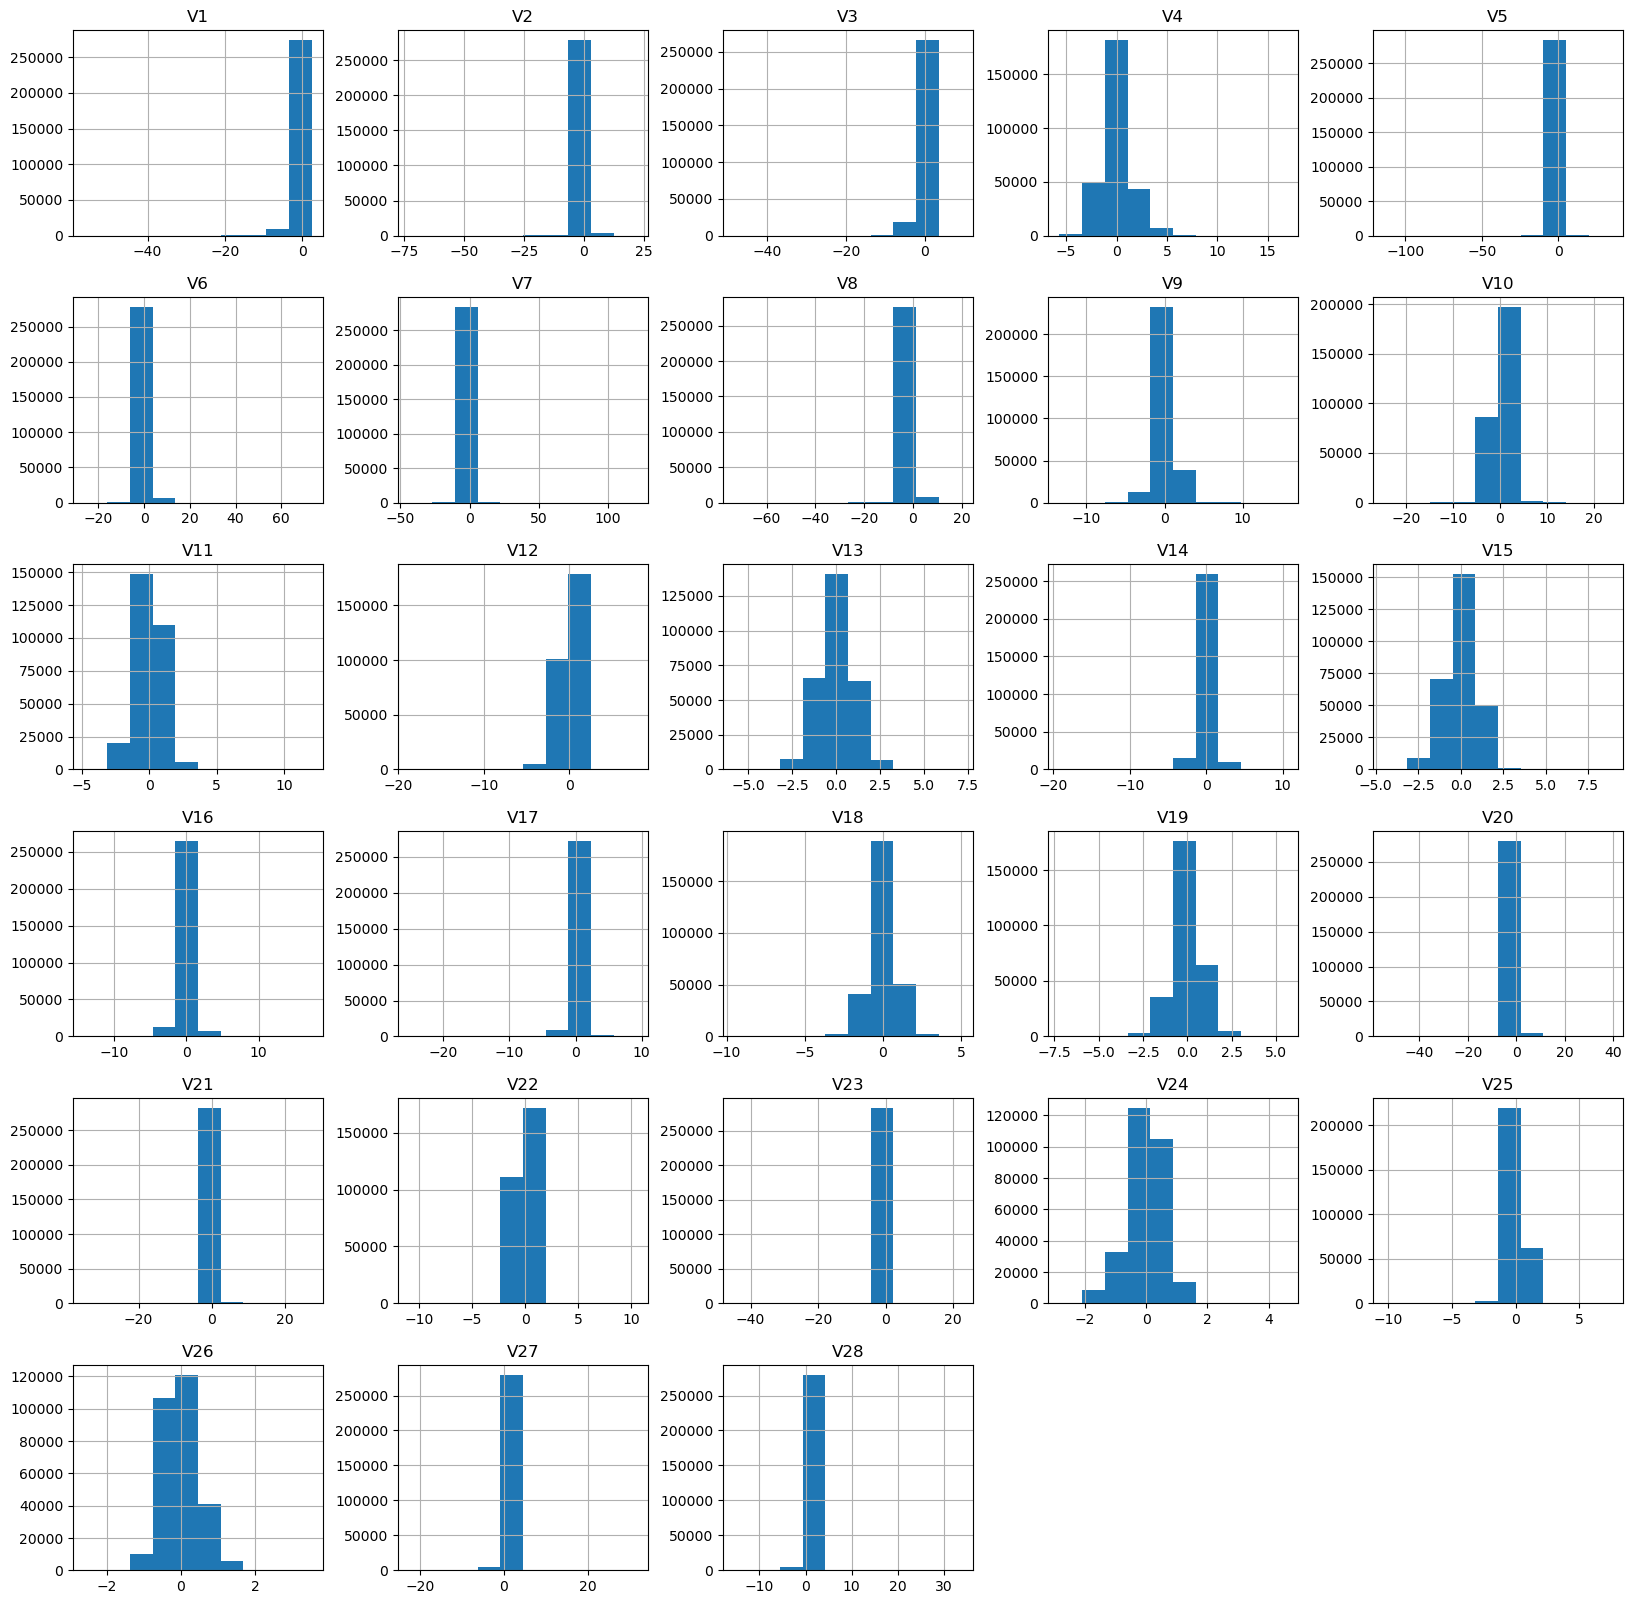

In [8]:
data_X.hist(figsize=(20, 20));

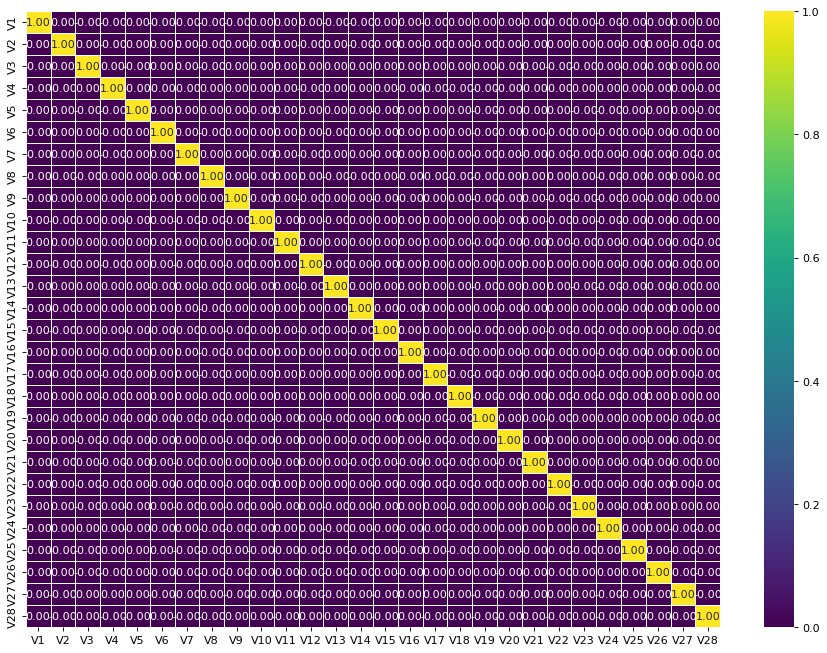

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10), dpi=80)
# Строим график тепловой карты (корреляция между числовыми признаками)
sns.heatmap(
    #data=df,
    data=data_X.corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    fmt='.2f',
    cmap='viridis'
);

In [35]:
# Нормализация значений признаков
data_scaled_X = StandardScaler().fit_transform(data_X)
data_train_scaled_X = StandardScaler().fit_transform(data_train_X)

# <center> Простейшие методы - 3 Сигмы </center>

In [11]:
up_bound = data_scaled_X.mean(axis=0) + 3 * data_scaled_X.std(axis=0)
low_bound = data_scaled_X.mean(axis=0) - 3 * data_scaled_X.std(axis=0)

sigma_outliers = np.where((data_scaled_X < low_bound) | (data_scaled_X > up_bound), 1, 0).any(axis=1).astype('int8')

In [12]:
# Подсчет количества и процента выбросов для 3-x сигм
sigma_sum = sigma_outliers.sum()
sigma_percent = sigma_sum / sigma_outliers.size * 100

In [13]:
# Вывод информации по аномальным выбросам
print(f'Количество выбросов в выборке для 3-x сигм: {sigma_sum}')
print(f'Процент выбросов в выборке для 3-x сигм: {sigma_percent:.2f}%')

Количество выбросов в выборке для 3-x сигм: 36636
Процент выбросов в выборке для 3-x сигм: 12.86%


In [14]:
# Если сравнивать с размеченными данными: Количество аномалий: 492; Процент аномалий: 0.17%
# Метод 3-х сигм дает слишком много выбросов

## <center> Distance-based (t-SNE)</center>

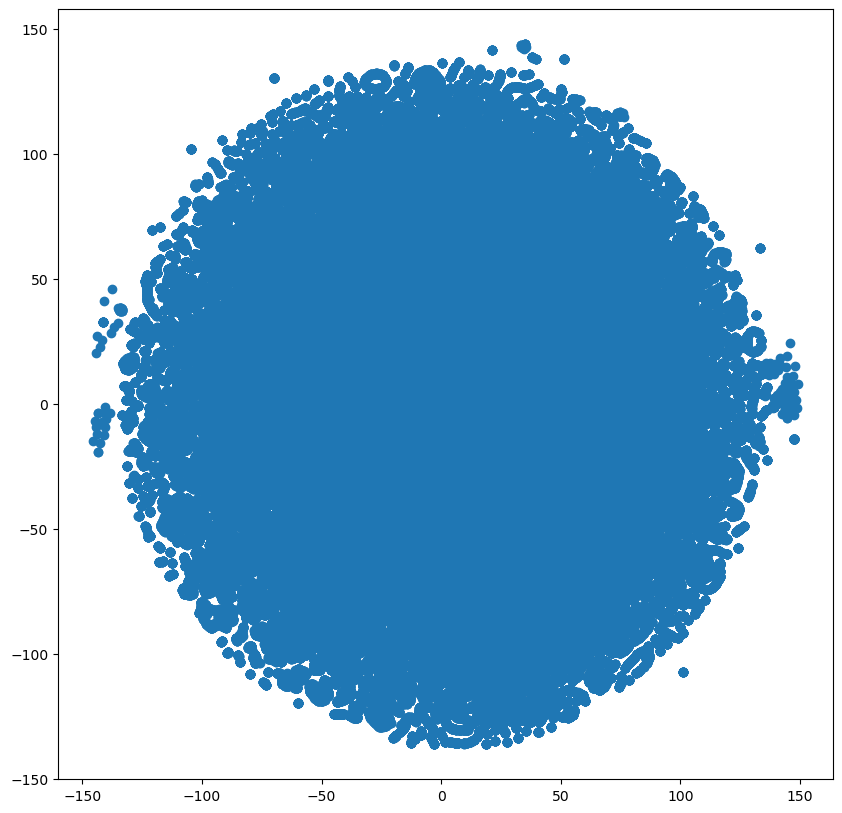

In [15]:
# количество главных компонент, количество ближайших соседей
tsne = TSNE(n_components=2, perplexity=10)
tsne_transformed = tsne.fit_transform(data_scaled_X)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

In [16]:
# На графике четко видно, что есть как отдельные выбросы, так и целые области с выбросами

## One-Class SVM (Support Vector Machine )

In [42]:
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
one_class_svm.fit(data_scaled_X)
# Предсказние аномалий
svm_outliers = one_class_svm.predict(data_scaled_X)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [48]:
svm_percent = sum(svm_outliers) / svm_outliers.size * 100
# Вывод информации по аномальным  выбросам
print(f'Количество выбросов в выборке: {sum(svm_outliers)}')
print(f'Процент выбросов в выборке: {svm_percent:.2f}%')

Количество выбросов в выборке: 14260
Процент выбросов в выборке: 5.01%


In [44]:
# Матрица с метриками (по отдельным классам): Precision, Recall и F1-score
# F1-score - Гармоническое среднее между Precision и Recall
# support - Количество значений отдельных классов, в тестовом наборе данных
# macro avg - Обычное среднее
# weighted avg - Взвешенное среднее, с учетом количества значений отдельных классов
classificationReport = classification_report(Y, svm_outliers)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.87      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



In [45]:
# Вычислить матрицу ошибок
# По главной диагонали: правильные ответы.
# По второй диагонали: ошибки
# confusionMatrix[0][1]: Модель выдала True, там где на самом деле было Fale
# confusionMatrix[1][0]: Модель выдала False, там где на самом деле было True
confusionMatrix = confusion_matrix(Y, svm_outliers)
confusionMatrix

array([[270485,  13830],
       [    62,    430]], dtype=int64)

In [46]:
14260 - 492

13768

In [30]:
# Модель OneClassSVM определила 13768 лишних выбросов

## <center> Isolation Forest </center>

In [47]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, max_features=1.0, bootstrap=True)
isolation_forest.fit(data_scaled_X)
# Предсказние аномалий
isolation_outliers = isolation_forest.predict(data_scaled_X)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [49]:
isolation_percent = sum(isolation_outliers) / isolation_outliers.size * 100
# Вывод информации по аномальным  выбросам
print(f'Количество выбросов в выборке: {sum(isolation_outliers)}')
print(f'Процент выбросов в выборке: {isolation_percent:.2f}%')

Количество выбросов в выборке: 14241
Процент выбросов в выборке: 5.00%


In [50]:
classificationReport = classification_report(Y, isolation_outliers)
print(classificationReport)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.84      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.90      0.52    284807
weighted avg       1.00      0.95      0.97    284807



In [51]:
confusionMatrix = confusion_matrix(Y, isolation_outliers)
confusionMatrix

array([[270487,  13828],
       [    79,    413]], dtype=int64)

In [52]:
14241 - 492

13749

In [53]:
# Модель Isolation Forest определила 13749 лишних выбросов

One-Class SVM и Isolation Forest показали одинаковые результаты.
Возможно нужо поиграться с параметрами.
Чем они действительно отличаются - это скоростью обучения.
Если Isolation Forest отрабатывает практически многовенно,
то после каждого запуска One-Class SVM приходилось ждать минут по 40-45!